# Introduction to regression with Nural Network with TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.



In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


#Creating data to view and fit

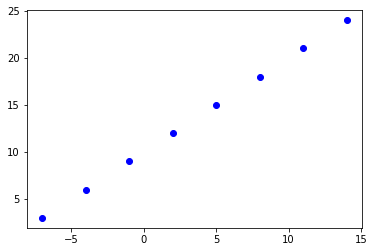

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# Visualize it
plt.plot(X, y, 'bo')

# Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our nmpy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

Text(0, 0.5, 'Y axis')

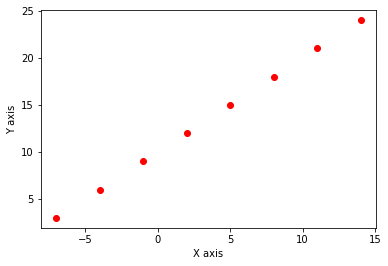

In [ ]:
plt.scatter(X, y, c='r')
plt.xlabel("X axis")
plt.ylabel("Y axis")

# Steps in modeling with tensorflow
1.**Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

2.**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

3.Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [ ]:
# Setting the seed
tf.random.set_seed(42)

# Creating the model using the sequential API
model = tf.keras.Sequential([ 
tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is sort for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 240ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123


In [ ]:
# Check X & y
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.1])
y_pred

array([[15.83303]], dtype=float32)

# Improving our model
To improve our model, we alter almost every part of the 3 steps we went through before

1.**Creating a model** - here we might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2.**Compiling a model** - we might want to choose optimization function or perhaps change the learning rate of the optimization function.

3.Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Setting the seed
tf.random.set_seed(42)

# Creating the model using the sequential API
model = tf.keras.Sequential([ 
tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is sort for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100) # This time we will train for longer

Epoch 1/100
1/1 [==============================] - 0s 231ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 3m

In [ ]:
# Remind ourselves
# Check X & y
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
# Let's see if our model's prediction has improved...
y_pred = model.predict([17.0])
y_pred

array([[30.158512]], dtype=float32)

In [ ]:
# Let's see if we can change another to improve our model

# we are going to add an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=100, activation=None),
  tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 323ms/step - loss: 14.6302 - mae: 14.6302
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.6545 - mae: 13.6545
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6828 - mae: 12.6828
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7089 - mae: 11.7089
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7265 - mae: 10.7265
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.7304 - mae: 9.7304
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7155 - mae: 8.7155
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6771 - mae: 7.6771
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.6850 - mae: 6.6850
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8416 - mae: 6.8416
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [ ]:
#Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# lets make prediction
model.predict([17.0])


array([[26.717861]], dtype=float32)

# So here what we acan do to improve our model:

1. Adding layers
2. increase the number of hidden units
3. Change the activation function
4. Change the Optimization function **
5. Change the learning rate ***
6. Fitting on more data
7. Fitting for longer


# Evaluating a model
A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

#When it comes to evaluation, we'll want to remember the words: 
"visualize, visualize, visualize."

It's a good idea to visualize:

1.The data - what data are you working with? What does it look like?

2.The model itself - what does the architecture look like? What are the different shapes?

3.The training of a model - how does a model perform while it learns?

4.The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Text(0, 0.5, 'Y axis')

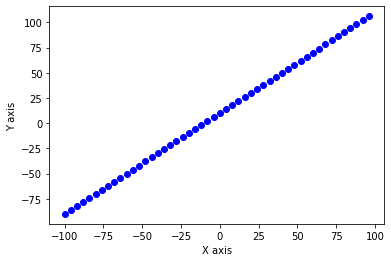

In [ ]:
# Visualize the data
plt.plot(X, y, "bo")
plt.xlabel("X axis")
plt.ylabel("Y axis")

# 3 Sets
1.Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

2.Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

3.Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [ ]:
#Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

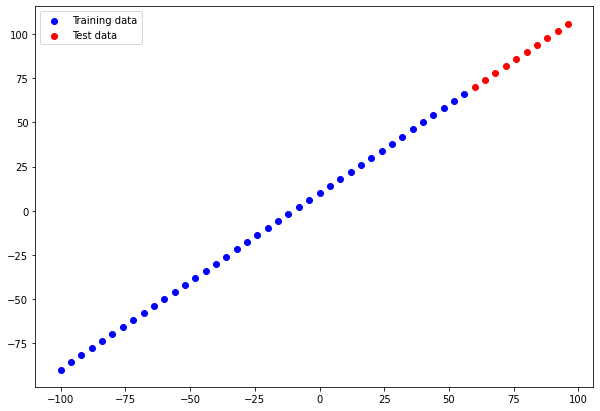

In [ ]:
# Visualising our data
plt.figure(figsize=(10,7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c = "b", label="Training data")
# Plot the test data in red
plt.scatter(X_test, y_test, c = "r", label= "Test data")
# Show legend
plt.legend();

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's build a nural network model for our data
tf.random.set_seed(33)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=10, input_shape = [1], activation=None, name="input_layer"),
  tf.keras.layers.Dense(units=1,name="output_layer")

],name="Model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])



In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


1.Total params - total number of parameters in the model.

2.Trainable parameters - these are the parameters (patterns) the model can update as it trains.

3.Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [ ]:
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 23.9241 - mae: 23.9241
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 17.8883 - mae: 17.8883
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 11.5277 - mae: 11.5277
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 8.1275 - mae: 8.1275
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 9.6179 - mae: 9.6179
Epoch 6/200
2/2 [==============================] - 0s 5ms/step - loss: 11.2156 - mae: 11.2156
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 11.8811 - mae: 11.8811
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 11.7480 - mae: 11.7480
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 11.1377 - mae: 11.1377
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 9.9659 - mae: 9.9659
Epoch 11/200
2/2 [==============================] - 0s 6ms/step -

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


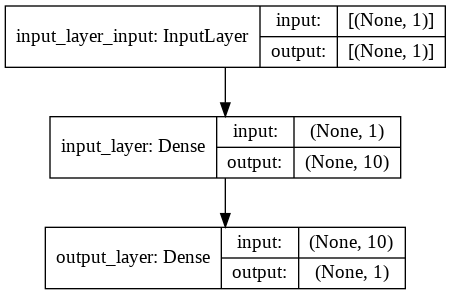

In [ ]:
# another way to visualize our model
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes=True)

#Visualizing our model's predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often we'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [ ]:
# Make some Prediction
y_pred = model.predict(X_test)
y_pred

array([[ 68.47541 ],
       [ 72.37399 ],
       [ 76.27256 ],
       [ 80.17114 ],
       [ 84.06972 ],
       [ 87.9683  ],
       [ 91.866875],
       [ 95.765465],
       [ 99.66405 ],
       [103.562614]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets create a ploting function
def plot_prediction(train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test,
                    prediction=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,8))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data,prediction,c="r",label="Predictions")
  # Show the legend()
  plt.legend();

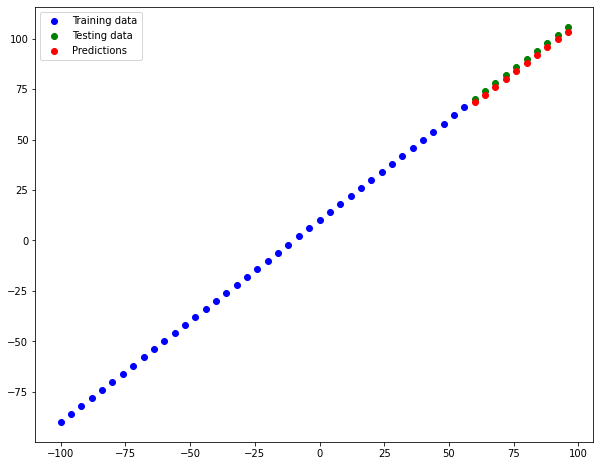

In [ ]:
plot_prediction(train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test,
                    prediction=y_pred)

# Evaluating our model with regression evaluation metrics

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

1.Mean absolute error (MAE) - the mean difference between each of the predictions.

2.Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

In [ ]:
# Evaluate our model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 85ms/step - loss: 1.9810 - mae: 1.9810


[1.9809868335723877, 1.9809868335723877]

In [ ]:
y_pred

array([[ 68.47541 ],
       [ 72.37399 ],
       [ 76.27256 ],
       [ 80.17114 ],
       [ 84.06972 ],
       [ 87.9683  ],
       [ 91.866875],
       [ 95.765465],
       [ 99.66405 ],
       [103.562614]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# MAE
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19.52459 , 16.100805, 13.436464, 11.531543, 10.386057, 10.      ,
       10.373375, 11.506186, 13.398428, 16.05009 ], dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19.52459 , 16.100805, 13.436464, 11.531543, 10.386057, 10.      ,
       10.373375, 11.506186, 13.398428, 16.05009 ], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.47541 ],
       [ 72.37399 ],
       [ 76.27256 ],
       [ 80.17114 ],
       [ 84.06972 ],
       [ 87.9683  ],
       [ 91.866875],
       [ 95.765465],
       [ 99.66405 ],
       [103.562614]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.47541 ,  72.37399 ,  76.27256 ,  80.17114 ,  84.06972 ,
        87.9683  ,  91.866875,  95.765465,  99.66405 , 103.562614],
      dtype=float32)>

In [ ]:
y_pred

array([[ 68.47541 ],
       [ 72.37399 ],
       [ 76.27256 ],
       [ 80.17114 ],
       [ 84.06972 ],
       [ 87.9683  ],
       [ 91.866875],
       [ 95.765465],
       [ 99.66405 ],
       [103.562614]], dtype=float32)

In [ ]:
# Changing the shape of the y_pred same as y_test
y_pred=tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.47541 ],
       [ 72.37399 ],
       [ 76.27256 ],
       [ 80.17114 ],
       [ 84.06972 ],
       [ 87.9683  ],
       [ 91.866875],
       [ 95.765465],
       [ 99.66405 ],
       [103.562614]], dtype=float32)>

In [ ]:
# Now calculate the MAE
tf.keras.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1.9809875>

In [ ]:
tf.keras.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred)).numpy() # only the MAE

1.9809875

In [ ]:
#Calculating the mean square error
tf.keras.losses.MSE(y_true=y_test,y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=4.0091734>

In [ ]:
# Another method to calculate the mean square error
tf.metrics.MSE(y_true=y_test,y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=4.0091734>

In [ ]:
# Make some function of calculating MAE & MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy()


In [ ]:
mae(y_test, y_pred)

1.9809875

In [ ]:
mse(y_test, y_pred)

4.0091734

# Running experiment to improve our model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways we can do this, but 3 of the main ones are:

1.Get more data - get more examples for our model to train on (more opportunities to learn patterns).

2.Make our model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3.Train for longer - give our model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when we're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1.model_1 - same as original model, 1 layer, trained for 100 epochs.

2.model_2 - 2 layers, trained for 100 epochs.

3.model_3 - 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

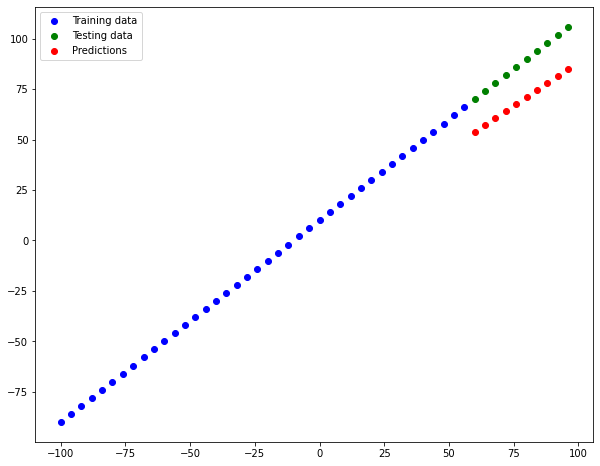

In [ ]:
# make and plot prediction for model 1
y_pred_1 = model_1.predict(X_test)
plot_prediction(prediction=y_pred_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, tf.constant(y_pred_1))
mse_1 = mse(y_test, tf.constant(y_pred_1))
mae_1, mse_1

(18.745327, 353.57336)

In [ ]:
# Build model_2 , with 2 hidden layers , 100 epochs
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, activation=None),
  tf.keras.layers.Dense(units=1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0) # set verbose to 0 for less output

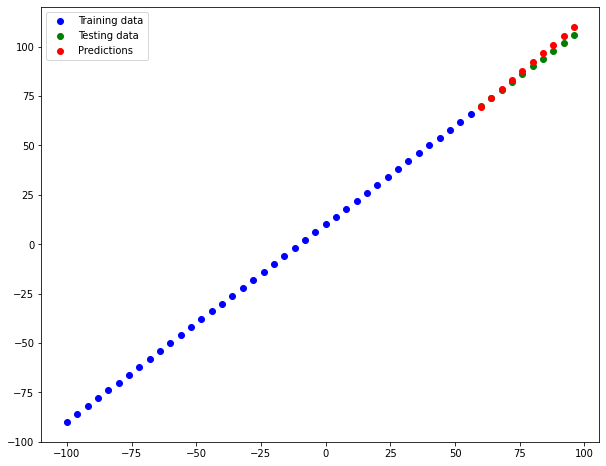

In [ ]:
# Make and plot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_prediction(prediction=y_pred_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, tf.constant(y_pred_2))
mse_2 = mse(y_test, tf.constant(y_pred_2))
mae_2, mse_2

(1.9098114, 5.459232)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, activation=None),
  tf.keras.layers.Dense(units=1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(X_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output

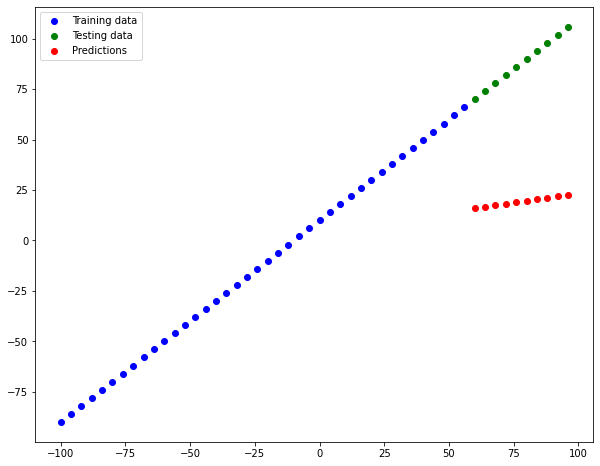

In [ ]:
# Make and plot predictions for model_3
y_pred_3 = model_3.predict(X_test)
plot_prediction(prediction=y_pred_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, tf.constant(y_pred_3))
mse_3 = mse(y_test, tf.constant(y_pred_3))
mae_3, mse_3

(68.68786, 4804.4717)

#Comparing Results
Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                ["model_2", mae_2, mse_2],
                ["model_3", mae_3, mse_3]]

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,4804.471680


In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# Tracking experiment
One really good habit to get into is tracking our modelling experiments to see which perform better than others.
We've done a simple version of this above (keeping the results in different variables).

**Resource / Tools**:

1.TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

2.Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).


#Saving Our Models
Once we've trained a model and found one which performs to our liking, we'll probably want to save it for use elsewhere (like a web application or mobile device).

we can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1.The SavedModel format (default).
2.The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should we use?

It depends on our situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
# Save a model using savedmodel format
model_2.save("/content/drive/MyDrive/TensorFlow2.0_certification/saved_model/best_model_savedmodel_format")


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TensorFlow2.0_certification/saved_model/best_model_savedmodel_format/assets


In [ ]:
# Save model using the HDF5 format
model_2.save("/content/drive/MyDrive/TensorFlow2.0_certification/saved_model/best_model_HDF5_format.h5")

# Loading in a saved model

In [ ]:
# Loading in the Savedmodel format model
loaded_savedmodel_format = tf.keras.models.load_model("/content/drive/MyDrive/TensorFlow2.0_certification/saved_model/best_model_savedmodel_format")
loaded_savedmodel_format.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compare model_2 predictions with Savedmodel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_savedmodel_format_preds = loaded_savedmodel_format.predict(X_test)
loaded_savedmodel_format_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in amodel using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/drive/MyDrive/TensorFlow2.0_certification/saved_model/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check to see if loaded.h5 model prediction match model_2 predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

#Downloading a model (from Google Colab)
Say we wanted to get your model from Google Colab to our local machine, we can do one of the following things:

1.Right click on the file in the files pane and click 'download'.

2.Use the code below.

In [ ]:
# Code method
# Downloading a file from google colab
from google.colab import files
files.download("/content/drive/MyDrive/TensorFlow2.0_certification/saved_model/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger example 

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline


In [ ]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create X and y values ( feature variables )
X = insurance_onehot.drop("charges",axis=1)
y = insurance_onehot["charges"]


In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 8)


In [ ]:
len(X_train), len(X_test)

(1070, 268)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
249,29,28.975,1,0,1,1,0,1,0,0,0
1246,45,25.700,3,1,0,1,0,0,0,0,1
116,58,49.060,0,0,1,1,0,0,0,1,0
968,21,25.745,2,0,1,1,0,1,0,0,0
274,25,27.550,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
136,19,34.100,0,0,1,1,0,0,0,0,1
986,43,30.115,3,0,1,1,0,0,1,0,0
133,19,25.555,0,0,1,1,0,0,1,0,0
361,35,30.500,1,0,1,1,0,0,0,0,1


In [ ]:
# Build a nural  network
tf.random.set_seed(52)

#Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=10),
  tf.keras.layers.Dense(units=1)
])

#Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8597.7432 - mae: 8597.7432
Epoch 2/100
34/34 [==============================] - 0s 961us/step - loss: 7605.3301 - mae: 7605.3301
Epoch 3/100
34/34 [==============================] - 0s 995us/step - loss: 7727.6792 - mae: 7727.6792
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.2319 - mae: 7573.2319
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.7002 - mae: 7735.7002
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7503.2490 - mae: 7503.2490
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7704.2881 - mae: 7704.2881
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7635.7603 - mae: 7635.7603
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7360.3872 - mae: 7360.3872
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7719.5176 - mae: 7719.

In [ ]:
# Check the results of the insurance_model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7213.0366 - mae: 7213.0366


[7213.03662109375, 7213.03662109375]

 # Let's try to improve our model


Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

1.Increasing the number of layers (2 -> 3). 

2.Increasing the number of units in each layer (except for the output layer).

3.Changing the optimizer (from SGD to Adam).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5201.2871 - mae: 5201.2871


[5201.287109375, 5201.287109375]

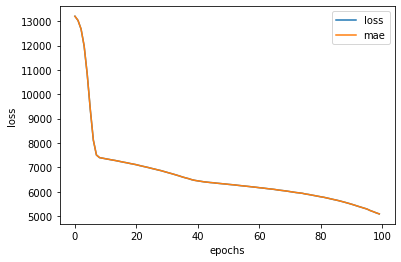

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_3.fit(X_train, y_train, epochs=259, verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4043.9087 - mae: 4043.9087


[4043.90869140625, 4043.90869140625]

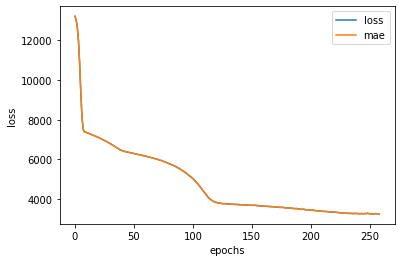

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

#Question: How long should we train for?
It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.


#Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

1.Turning all of your data to numbers (a neural network can't handle strings).
2.Making sure your data is in the right shape (verifying input and output shapes)
3.**Feature scaling:**

    i)Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    ii)Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    iii)Which one should you use?
      With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


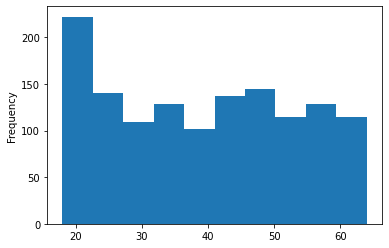

In [ ]:
X["age"].plot(kind="hist")

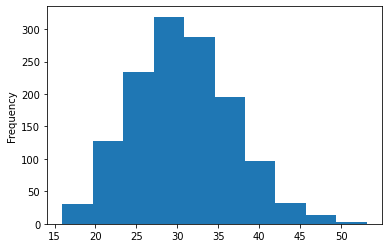

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our date we need to borrow few classes from sklearn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #Turn all values in this column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
# Create our X and y values
X = insurance.drop("charges",axis=1)
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the column transformer to our training data
ct.fit(X_train)
#Transform our training data with normalization (MinMaxScaler and Onehotencoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
#What does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Build a nural network model to fit our normalized data
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(units=100),
  tf.keras.layers.Dense(units=10),
  tf.keras.layers.Dense(units=1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:

# Evaulate 3rd model
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]